## Trabalho Final - Ciência de Dados - Enap / 2020

In [ ]:
# Preencha seu Nome:
Nome: Victor Cannavale

### Apresentação do Dataset

In [1]:
# YOUR CODE HERE
O Dataset escolhi trata-se dos dados abertos da Câmara dos Deputados. O Dataser, em questão, possui uma vasta coleção de dados, 
entre eles: Legislaturas, Deputados, Partidos, Blocos, Órgãos, Frentes, Eventos, Preposições, Votações, Refência e Atualização. 
    
Os dados estão disponibilizados em formato tabular e em diversos formatos. 

SyntaxError: invalid syntax (<ipython-input-1-d9823c03712a>, line 2)

#### Link para Download do Dataset

In [ ]:
# Cole o link do dataset aqui
Página Principal: https://dadosabertos.camara.leg.br/

Dataset:

https://dadosabertos.camara.leg.br/arquivos/proposicoes/csv/proposicoes-2020.csv
https://dadosabertos.camara.leg.br/arquivos/proposicoesAutores/csv/proposicoesAutores-2020.csv

### Motivação

In [ ]:
# YOUR CODE HERE
A motivação para o trabalho com a base de dados da Câmara dos Deputados permite adquirir conhecimento no funcionamento legislativo,
além de agregar conhecimento para o meu trabalho na representação institucional do órgão.

### Investigação

In [3]:
# Bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import sys
import seaborn as sns
import re
%matplotlib inline

In [4]:
#Banco de dados (Preposições e Autores)

df1 = pd.read_csv('https://dadosabertos.camara.leg.br/arquivos/proposicoes/csv/proposicoes-2020.csv', sep=';')
df2 = pd.read_csv('https://dadosabertos.camara.leg.br/arquivos/proposicoesAutores/csv/proposicoesAutores-2020.csv', sep=';')

df_dados = df1.merge(df2, left_on='id', right_on='idProposicao')

df_dados.head()

,id,uri,siglaTipo,numero,ano,codTipo,descricaoTipo,ementa,ementaDetalhada,keywords,...,idDeputadoAutor,uriAutor,codTipoAutor,tipoAutor,nomeAutor,siglaPartidoAutor,uriPartidoAutor,siglaUFAutor,ordemAssinatura,proponente
0,2077498,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600,2020,139,Projeto de Lei,"Altera a Lei nº 8.069, de 13 de julho de 1990,...",NaN,"Alteração, Estatuto da Criança e do Adolescent...",...,141383.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Antonio Bulhões,PRB,https://dadosabertos.camara.leg.br/api/v2/part...,SP,1,1
1,2116186,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1599,2020,139,Projeto de Lei,Institui a Semana Nacional de Prevenção e Comb...,NaN,"Criação, Semana Nacional de Prevenção e Combat...",...,178956.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,Mariana Carvalho,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,RO,1,1
2,2236217,https://dadosabertos.camara.leg.br/api/v2/prop...,SUG,1,2020,285,Sugestão,Sugere estudo visando verificar a atuação do M...,NaN,NaN,...,NaN,https://dadosabertos.camara.leg.br/api/v2/orga...,70000,Sociedade Civil,Sindicato Nacional dos Trabalhadores em Fundaç...,NaN,NaN,NaN,1,1
3,2236218,https://dadosabertos.camara.leg.br/api/v2/prop...,SUG,2,2020,285,Sugestão,Sugere audiência pública para debater assuntos...,NaN,NaN,...,NaN,https://dadosabertos.camara.leg.br/api/v2/orga...,70000,Sociedade Civil,Associação Nacional de Fibromiálgicos e Doença...,NaN,NaN,NaN,1,1
4,2236222,https://dadosabertos.camara.leg.br/api/v2/prop...,RIC,1,2020,148,Requerimento de Informação,Requer informações detalhadas ao Ministro da C...,NaN,NaN,...,204429.0,https://dadosabertos.camara.leg.br/api/v2/depu...,10000,Deputado,João H. Campos,PSB,https://dadosabertos.camara.leg.br/api/v2/part...,PE,1,1


### Análise dos dados da Câmara dos Deputados:

#####  1- Produção Legislativa por partido para projetos de lei

In [9]:
# Seleção de tabelas de interesse (Tipo de Proposta e Partido)
prodleg = df_dados.iloc[:,[2,37]]

In [54]:
# Contabilizar a quantidade de proposta produzida pelo partido para projetos de lei
prodlegqtd = prodleg[prodleg['siglaTipo'] == 'PL'].groupby(['siglaPartidoAutor']).agg('count')

Text(0.5, 1.0, 'Produção legislativa de projetos de lei na Câmara dos Deputados por Partido')

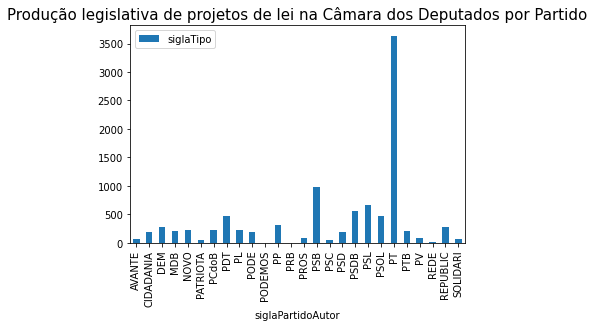

In [56]:
#Plotar no gráfico estas informações
graficprod = prodlegqtd.plot.bar(stacked=True)
graficprod.set_title('Produção legislativa de projetos de lei na Câmara dos Deputados por Partido', fontsize=15)

#Obs: O partido dos trabalhadores apresenta maior produção

#####  2 - Análise do tempo médio de aprovação de projetos de lei na Câmara dos Deputados

In [59]:
#Selecionar os dados a serem analisados
tempomedio = df_dados.iloc[:,[2,37,23,24,10,17]]

,siglaTipo,siglaPartidoAutor,ultimoStatus_regime,ultimoStatus_descricaoTramitacao,dataApresentacao,ultimoStatus_dataHora
0,PL,PRB,"Ordinária (Art. 151, III, RICD)",Publicação de Proposição,2016-02-18T12:56:57,2020-09-29T00:00:00
1,PL,PSDB,"Ordinária (Art. 151, III, RICD)",Publicação de Proposição,2016-11-07T18:01:00,2020-09-29T00:00:00
2,SUG,NaN,"Ordinária (Art. 151, III, RICD)",Apresentação de Proposição,2020-01-03T11:09:00,2020-01-03T11:09:00
3,SUG,NaN,"Ordinária (Art. 151, III, RICD)",Apresentação de Proposição,2020-01-03T11:24:00,2020-01-03T11:24:00
4,RIC,PSB,NaN,Ratificação de Parecer,2020-01-03T14:50:13,2020-07-22T16:30:00
...,...,...,...,...,...,...
48168,REQ,PSD,NaN,Apresentação de Proposição,2020-10-22T18:13:00,2020-10-22T19:31:45
48169,REQ,PTB,NaN,Apresentação de Proposição,2020-10-22T18:13:00,2020-10-22T19:31:45
48170,REQ,PTB,NaN,Apresentação de Proposição,2020-10-22T18:13:00,2020-10-22T19:31:45
48171,REQ,PSDB,NaN,Apresentação de Proposição,2020-10-22T18:20:00,2020-10-22T19:32:58


In [62]:
#Transformação a data de apresentacao e último status em data

tempomedio['dataApresentacao'] = pd.to_datetime(tempomedio['dataApresentacao']).dt.date
tempomedio['ultimoStatus_dataHora'] = pd.to_datetime(tempomedio['ultimoStatus_dataHora']).dt.date

<ipython-input-62-0b041f86c6b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempomedio['dataApresentacao'] = pd.to_datetime(tempomedio['dataApresentacao']).dt.date
<ipython-input-62-0b041f86c6b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempomedio['ultimoStatus_dataHora'] = pd.to_datetime(tempomedio['ultimoStatus_dataHora']).dt.date


In [66]:
#Calcular os dias de tramitação de um projeto de lei

tempomedio['TempodeTramitacao'] = tempomedio['ultimoStatus_dataHora'] - tempomedio['dataApresentacao']
tempomedio['TempodeTramitacao'] = tempomedio['TempodeTramitacao'].astype("timedelta64[D]").astype(int)

<ipython-input-66-525aa98eb127>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempomedio['TempodeTramitacao'] = tempomedio['ultimoStatus_dataHora'] - tempomedio['dataApresentacao']
<ipython-input-66-525aa98eb127>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempomedio['TempodeTramitacao'] = tempomedio['TempodeTramitacao'].astype("timedelta64[D]").astype(int)


In [88]:
#Filtrar a tabela por projetos de lei e com a seguinte condição: "Transformação em Norma Jurídica" ou "Transformado em Norma Jurídica com Veto Parcial"

#tempomediogr = tempomedio[(tempomedio['siglaTipo'] == "PL") & (tempomedio['ultimoStatus_descricaoTramitacao'] == "Transformação em Norma Jurídica") | (tempomedio['ultimoStatus_descricaoTramitacao'] == "Transformado em Norma Jurídica com Veto Parcial")]
#tempomediogr = tempomedio.loc[(tempomedio['siglaTipo'] == "PL") & (tempomedio['ultimoStatus_descricaoTramitacao'] == "Transformação em Norma Jurídica")]
tempomediogr = tempomedio[(tempomedio['siglaTipo'] == "PL") & ((tempomedio['ultimoStatus_descricaoTramitacao'] == "Transformação em Norma Jurídica") | (tempomedio['ultimoStatus_descricaoTramitacao'] == "Transformado em Norma Jurídica com Veto Parcial"))]
tempomediogr 

,siglaTipo,siglaPartidoAutor,ultimoStatus_regime,ultimoStatus_descricaoTramitacao,dataApresentacao,ultimoStatus_dataHora,TempodeTramitacao
2981,PL,CIDADANIA,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-03-17,2020-04-23,37
2982,PL,PP,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-03-17,2020-04-23,37
2983,PL,PSB,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-03-17,2020-04-23,37
3326,PL,PT,"Urgência (Art. 155, RICD)",Transformado em Norma Jurídica com Veto Parcial,2020-03-18,2020-08-24,159
3327,PL,PT,"Urgência (Art. 155, RICD)",Transformado em Norma Jurídica com Veto Parcial,2020-03-18,2020-08-24,159
...,...,...,...,...,...,...,...
24668,PL,PSL,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-06-02,2020-09-23,113
24669,PL,PSL,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-06-02,2020-09-23,113
24670,PL,PT,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-06-02,2020-09-23,113
24671,PL,PTB,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-06-02,2020-09-23,113


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de tempo para aprovação de projetos de lei')

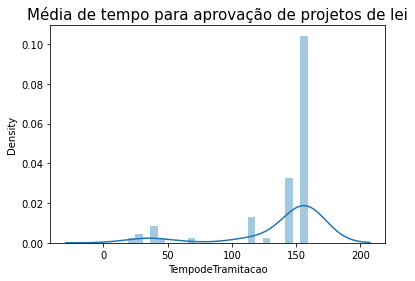

In [92]:
#Plotar no gráfico estas informações do tempo de tramitação de projetos de lei.

grafictempo = sns.distplot(tempomediogr ['TempodeTramitacao'])
grafictempo.set_title('Média de tempo para aprovação de projetos de lei', fontsize=15)

#Obs: Percebemos que entre 100 e 200 aumenta o númenro de conversões.

In [91]:
tempomediogr['TempodeTramitacao'].describe()

count     79.000000
mean     138.835443
std       38.795794
min       19.000000
25%      146.000000
50%      159.000000
75%      159.000000
max      159.000000
Name: TempodeTramitacao, dtype: float64

In [95]:
#Tempo médio de tramitação por partido

tempopartido = tempomediogr.groupby('siglaPartidoAutor').mean()
tempopartido  = round(tempopartido)/10
tempopartido

,TempodeTramitacao
siglaPartidoAutor,
CIDADANIA,3.7
DEM,12.6
MDB,1.9
PATRIOTA,11.3
PCdoB,14.6
PL,4.0
PODEMOS,4.4
PP,6.0
PROS,6.8


In [97]:
# Classificar os dados conforme a média de tramitação

tempomediogr.loc[tempomediogr['TempodeTramitacao'] >= 138, 'classe'] = 'maior'  
tempomediogr.loc[tempomediogr['TempodeTramitacao'] < 138, 'classe'] = 'menor' 
tempomediogr

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,siglaTipo,siglaPartidoAutor,ultimoStatus_regime,ultimoStatus_descricaoTramitacao,dataApresentacao,ultimoStatus_dataHora,TempodeTramitacao,classe
2981,PL,CIDADANIA,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-03-17,2020-04-23,37,menor
2982,PL,PP,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-03-17,2020-04-23,37,menor
2983,PL,PSB,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-03-17,2020-04-23,37,menor
3326,PL,PT,"Urgência (Art. 155, RICD)",Transformado em Norma Jurídica com Veto Parcial,2020-03-18,2020-08-24,159,maior
3327,PL,PT,"Urgência (Art. 155, RICD)",Transformado em Norma Jurídica com Veto Parcial,2020-03-18,2020-08-24,159,maior
...,...,...,...,...,...,...,...,...
24668,PL,PSL,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-06-02,2020-09-23,113,menor
24669,PL,PSL,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-06-02,2020-09-23,113,menor
24670,PL,PT,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-06-02,2020-09-23,113,menor
24671,PL,PTB,"Urgência (Art. 155, RICD)",Transformação em Norma Jurídica,2020-06-02,2020-09-23,113,menor


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Quantidade de projetos acima ou abaixo da média')

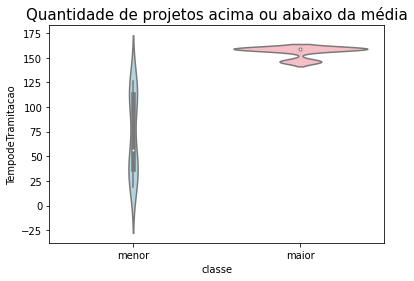

In [100]:
#Plotar as informações onde existe maior quantidade de projetos de lei transformados com base na média
qtdmedia = sns.violinplot("classe", "TempodeTramitacao", data=tempomediogr,
               palette=["lightblue", "lightpink"]);
qtdmedia.set_title('Quantidade de projetos acima ou abaixo da média', fontsize=15)

#Obs: O maior número de projetos convertidos se encontra na faixa de 150 a 175

In [104]:
#Descobrir aonde se encontram o partido na aprovação de seus projetos de lei

partidomedia = tempomediogr.where(tempomediogr.TempodeTramitacao >= 138).groupby('siglaPartidoAutor').TempodeTramitacao.count()
partidomedia2 = tempomediogr.where(tempomediogr.TempodeTramitacao < 138).groupby('siglaPartidoAutor').TempodeTramitacao.count()

In [105]:
partidomedia

siglaPartidoAutor
PCdoB        3
PSB         11
PT          48
REPUBLIC     1
Name: TempodeTramitacao, dtype: int64

In [106]:
partidomedia2

siglaPartidoAutor
CIDADANIA    1
DEM          1
MDB          1
PATRIOTA     1
PL           1
PODEMOS      1
PP           3
PROS         1
PSB          1
PSL          2
PT           2
PTB          1
Name: TempodeTramitacao, dtype: int64

#####  3 - Análise do Regime e o tempo de tramitação

In [107]:
tempomediogr['ultimoStatus_regime'].value_counts()

Urgência (Art. 155, RICD)    79
Name: ultimoStatus_regime, dtype: int64

#####  4 - Análise do período de conversão de projetos de lei

In [111]:
# Separar a data do último status em formato de mês

tempomediogr['ultimoStatus_dataHora'] =  pd.to_datetime(tempomediogr['ultimoStatus_dataHora'], format='%Y-%m-%d')
tempomediogr['MES'] = tempomediogr['ultimoStatus_dataHora'].dt.month

<ipython-input-111-ea4b81f9c099>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempomediogr['ultimoStatus_dataHora'] =  pd.to_datetime(tempomediogr['ultimoStatus_dataHora'], format='%Y-%m-%d')
<ipython-input-111-ea4b81f9c099>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempomediogr['MES'] = tempomediogr['ultimoStatus_dataHora'].dt.month


In [118]:
# Criar uma coluna com o numerador "1" para contabilizar os projetos de lei convertidos

tempomediogr['numero']= 1

<ipython-input-118-a5b2abc1c2c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempomediogr['numero']= 1


In [117]:
# Criar o agrupamento de mês com projetos de lei convertidos

convertidosmes = tempomediogr.groupby(['MES'],as_index=False).agg({'numero':sum})
convertidosmes

,MES,numero
0,4,6
1,5,1
2,6,1
3,7,1
4,8,49
5,9,6
6,10,15


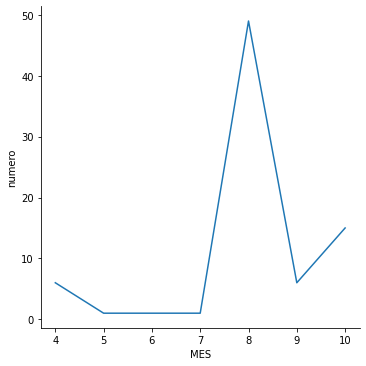

In [120]:
#Plotar as informações no histograma

sns.relplot(x="MES", y="numero", 
            kind="line", data=convertidosmes)

#Obs: Agosto foi um mês com maior conversão de projetos de lei

### Conclusões e Achados

##### Achados

In [ ]:
Quanto a produçao legislativa podemos perceber que o Partido dos Trabalhadores tem um alta produção no ano de 2020, o que
automaticamente no seu poder de conversão de projetos de lei, 50 até o momento, seguido do PSB com 11 conversões.

In [ ]:
Quanto ao tempo médio de conversões de projetos de lei podemos perceber que a maioria do projetos de lei tem o tempo de conversão
entre 150 a 160 dias, sendo a média 130 dias. Entre os partidos aquele que teve o menor tempo médio para aprovação foi o MDB o qual
teve apenas um projeto convertido. 

In [ ]:
Com base na média de tramitação percebmos que o Partido dos Trabalhadores com um total de 50 projetos convertidos, teve 48 
projetos com um tempo maior que a média para serem aprovados enquanto outros partidos com menos preposições mantiveram-se abaixo
da média.

In [ ]:
Quanto ao regime de tramitação foi possível perceber que o regime de urgência é vital para a transformação do projeto em lei,
tendo todos os dados respeitado este regime.

In [ ]:
Quanto ao período de conversão dos projetos de lei pode-se inferir que agosto é o mês que mais houve o processo de conversão. 

##### Conclusões

In [122]:
1 - Podemos perceber que a conversão de projetos de lei é baixa, no geral, porém destingui-se o comportamento das duas 
bancadas da Câmara dos Deputados, o Partidos dos Trabalhadores consegue aprovar suas preposições, enquanto o MDB teve apenas
um projeto convertido. 

SyntaxError: invalid syntax (<ipython-input-122-4641a4af8522>, line 1)

In [ ]:
2 - Podemos perceber que o regime de urgência é um critério fundamental para aprovação de projetos de lei em 2020.

In [ ]:
3 - O fato de a maioria dos projetos demorar mais de 130 para ser aprovado pode ser devido ao embate polítco para conversão.

In [123]:
4 - O fato de os projetos de lei serem, em sua grande maioria, convertidos em agosto pode inferir que:
    - Mundança no líder de governo;
    - A Câmara dos Deputados retorna a sessão deliberativa virtual do Plenário em agosto, parada devido a pandemia. 

SyntaxError: invalid syntax (<ipython-input-123-092b592ac810>, line 1)